In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,RepeatedKFold,GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
def AARE(y_actual,y_pred):
    aare = np.mean(abs((y_pred - y_actual) / y_actual)) * 100
    return aare

In [3]:
data = pd.read_csv('total_holdup.csv')
data = data.dropna()
data.shape

(394, 12)

In [4]:
data.head()

,Density of gas,Density of liquid,Viscosity of gas,Viscosity of liquid,Surface tension of liquid,Inner diameter,Packing height,Particle diameter,Bed Porosity,Superficial Gas Velocity,Superficial Liquid Velocity,Experimental Liquid Holdup
0,1.184,997.0,0.000019,0.000896,0.0721,0.14,2.0,0.0047,0.36,0.03,0.003988,0.175563
1,1.184,997.0,0.000019,0.000896,0.0721,0.14,2.0,0.0047,0.36,0.03,0.005988,0.175400
2,1.184,997.0,0.000019,0.000896,0.0721,0.14,2.0,0.0047,0.36,0.03,0.007984,0.193815
3,1.184,997.0,0.000019,0.000896,0.0721,0.14,2.0,0.0047,0.36,0.03,0.009881,0.206372
4,1.184,997.0,0.000019,0.000896,0.0721,0.14,2.0,0.0047,0.36,0.03,0.011929,0.217938


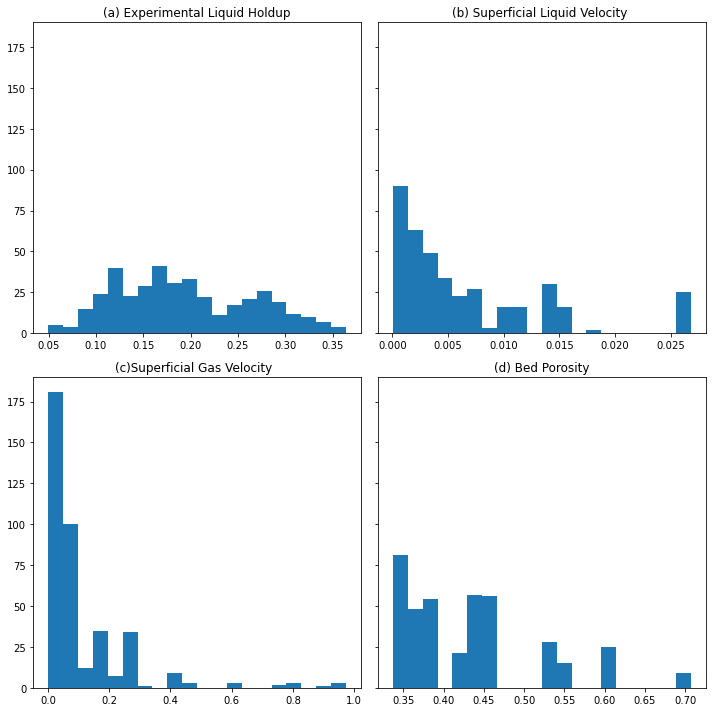

In [5]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True,figsize=(10,10))
n_bins = 20

axs[0,0].hist(data['Experimental Liquid Holdup'], bins=n_bins)
axs[0,0].set_title('(a) Experimental Liquid Holdup')
axs[0,1].hist(data['Superficial Liquid  Velocity'], bins=n_bins)
axs[0,1].set_title('(b) Superficial Liquid Velocity ')
axs[1,0].hist(data['Superficial Gas Velocity'], bins=n_bins)
axs[1,0].set_title('(c)Superficial Gas Velocity  ')
axs[1,1].hist(data['Bed Porosity'], bins=n_bins)
axs[1,1].set_title('(d) Bed Porosity')
plt.show()

In [6]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [8]:
X_train, X_test,y_train, y_test = train_test_split(X_scaled,y ,test_size=0.2,random_state =42)

## Linear Regression

In [9]:
reg = LinearRegression()
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)
y_pred_cv = cross_val_predict(reg,X_train,y_train,cv=kfold_cv)

print("r-sqr = ",r2_score(y_train,y_pred_cv))
print("MAE = ",mean_absolute_error(y_train,y_pred_cv))
print("AARE = ",AARE(y_train,y_pred_cv))

r-sqr =  0.7287297643010988
MAE =  0.028588968589143608
AARE =  17.094566021065848


In [10]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("r-sqr = ",r2_score(y_test,y_pred))
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("AARE = ",AARE(y_test,y_pred))

r-sqr =  0.7710834225819471
MAE =  0.027140759657538156
AARE =  15.838905761690459


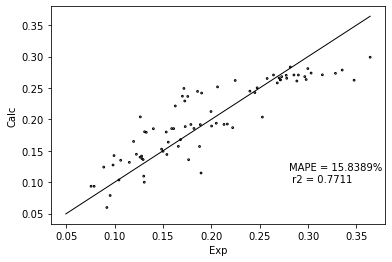

In [11]:
plt.scatter(y_test,y_pred,marker='o',facecolors='none', edgecolors='k',s=3)
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)],'k-', lw=1)
plt.xlabel('Exp')
plt.ylabel('Calc')
plt.text(0.28, .1,"MAPE = {:.4f}% \n r2 = {:.4f}".format(AARE(y_test,y_pred),r2_score(y_test,y_pred)))
plt.show()

## GBR

In [12]:
reg = GradientBoostingRegressor(loss='huber', max_depth=4, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)
y_pred_cv = cross_val_predict(reg,X_train,y_train,cv=kfold_cv)

print("r-sqr = ",r2_score(y_train,y_pred_cv))
print("MAE = ",mean_absolute_error(y_train,y_pred_cv))
print("AARE = ",AARE(y_train,y_pred_cv))


r-sqr =  0.9664787984086634
MAE =  0.007977372519129416
AARE =  4.720854400090037


In [13]:
reg = GradientBoostingRegressor(loss='huber', max_depth=4, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("r-sqr = ",r2_score(y_test,y_pred))
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("AARE = ",AARE(y_test,y_pred))

r-sqr =  0.969791581270692
MAE =  0.006751930887246751
AARE =  3.885085931808828


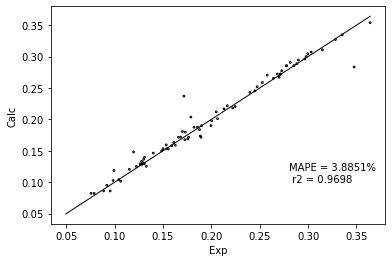

In [14]:
plt.scatter(y_test,y_pred,marker='o',facecolors='none', edgecolors='k',s=3)
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)],'k-', lw=1)
plt.xlabel('Exp')
plt.ylabel('Calc')
plt.text(0.28, .1,"MAPE = {:.4f}% \n r2 = {:.4f}".format(AARE(y_test,y_pred),r2_score(y_test,y_pred)))
plt.show()

# For selected features

In [15]:
top_selected_features = ['Superficial Liquid  Velocity',
                         'Bed Porosity',
                         'Superficial Gas Velocity',
                         ' Inner diameter',
                         'Packing height ',
                         'Particle diameter',
                         'Density of gas',
                         'Viscosity of liquid']

In [16]:
X_selected_features = X_scaled[top_selected_features]

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X_selected_features,y ,test_size=0.2,random_state =42)

In [18]:
reg = GradientBoostingRegressor(loss='huber', max_depth=4, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)
y_pred_cv = cross_val_predict(reg,X_train,y_train,cv=kfold_cv)

print("r-sqr = ",r2_score(y_train,y_pred_cv))
print("MAE = ",mean_absolute_error(y_train,y_pred_cv))
print("AARE = ",AARE(y_train,y_pred_cv))


r-sqr =  0.9680090192057073
MAE =  0.007582405363778353
AARE =  4.50830369328987


In [19]:
reg = GradientBoostingRegressor(loss='huber', max_depth=4, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("r-sqr = ",r2_score(y_test,y_pred))
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("AARE = ",AARE(y_test,y_pred))

r-sqr =  0.9652145054476919
MAE =  0.006810599733461864
AARE =  4.013457801096928


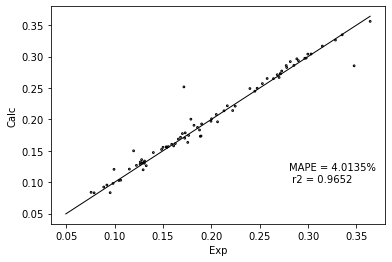

In [20]:
plt.scatter(y_test,y_pred,marker='o',facecolors='none', edgecolors='k',s=3)
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)],'k-', lw=1)
plt.xlabel('Exp')
plt.ylabel('Calc')
plt.text(0.28, .1,"MAPE = {:.4f}% \n r2 = {:.4f}".format(AARE(y_test,y_pred),r2_score(y_test,y_pred)))
plt.show()